# Imports

In [1]:
import os
import pydotplus
import numpy as np
import pandas as pd
from StringIO import StringIO
from IPython.display import Image
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Load Data

In [2]:
df = {}
for data in os.listdir('Data/'):
    if data.endswith('.csv'):
        df[data[:-4]] = pd.read_csv('Data/' + data)
print sorted(df.keys())

['caste', 'caste_percent', 'communicabledisease1', 'communicabledisease2', 'hdi2011', 'mentalhealth', 'poverty1', 'poverty1T', 'poverty2', 'poverty2T', 'sexratio', 'vaccinations', 'vaccinationsT', 'watersanitaion']


# Mental Health Exploration

In [3]:
# Create series with proportion of depression in population.
dep_series = df['mentalhealth'][(df['mentalhealth']['Mental problem'] == 'Depression') &
                                (df['mentalhealth']['Year AD'] == '2011/12')
                               ].set_index('District')['No of People'] / df['caste_percent'].set_index('Unnamed: 0')['Tot_Pop'] * 100.0
dep_series.fillna(0, inplace=True)
# Combine caste and depression data.
mh_df = df['caste_percent'].drop('Tot_Pop', axis=1).set_index('Unnamed: 0')
mh_df['Depression'] = dep_series
mh_df['Depression_zscore'] = (mh_df['Depression'] - mh_df['Depression'].mean()) / mh_df['Depression'].std()
mh_df['Labels'] = pd.cut(mh_df['Depression_zscore'], [-1, 2, 10], labels=[0, 1])
mh_df.fillna(0, inplace=True)

X = mh_df.ix[:, :-3]
y = mh_df['Labels']

In [4]:
# Gaussian Naive Bayes Model
gnb = GaussianNB()
gnb.fit(X, y)

print 'IS classification accuracy of Gaussian Naive Bayes: {:.2f}%'.format(gnb.score(X, y))

IS classification accuracy of Gaussian Naive Bayes: 0.85%


IS accuracy: 0.933333333333


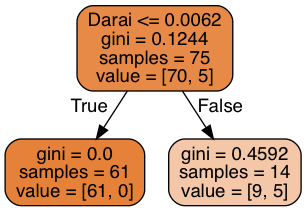

In [5]:
# Decision Tree Model
dtc = DecisionTreeClassifier(max_depth=1, random_state=324)
dtc.fit(X, y)

print 'IS accuracy: {}'.format(dtc.score(X, y))

# Display combined model.
dot_data = StringIO()  
export_graphviz(dtc, out_file=dot_data, feature_names=X.columns, filled=True, rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=250)  